**Dima Tsvetkov**

**NetID: dt169**

**Homework #4**

Agreement 1) This assignment represents my own work. I did not work on this assignment with
others. All coding was done by myself.

Agreement 2) I understand that if I struggle with this assignment that I will reevaluate whether
this is the correct class for me to take. I understand that the homework only gets harder.

# **1 VC dimension of Binary Decision Trees with Fixed Split Points**

For identical binary decision trees with l leaves:

$$\text{VC}=l,$$

For the lower bound we can distribute every point to it's own leave by choosing the correct
$x_i=\{x_{i1}, x_{i2}...x_{il}\}$ according to each leaf (i-th leaf has ${\{x_{i1}, x_{i2}...x_{il}\}}$
feature distribution) and label each leaf as any $y_i$ we need.

For example, for the tree of height 3 with 4 leaves we can select 4 points: 00, 01, 10, 11. First split
is based on the 1st feature, 2nd split is based on 2nd feature. so all the points are in their own leaves
and we can give them any labels from the set {00, 01, 10, 11}.

The upper bound can be understood from a simpler example of a tree with 2 leaves. Let's say we have 3 points
{00, 10, 11}. If the split is made based on the 1st feature, then 2nd and 3rd points will
be in the same leaf, if the split is made based on the 2nd feature - 1st and 2nd points are in the same leaf.
In that case there is no possible split that classify 1st point as 1, 2nd point as 0, and 3rd point as 1,
because we cannot place 1st and 3rd points into the same leaf.
For the points {00, 10, 01} we can use the same logic. So we cannot shatter 3 points.


The leafs can be assigned accordingly to any hypothesis,
inducing 2 in power of 2d implementations by the class of decision trees

# **2 Topic Modeling with EM (Ed Tam)**

**2.1 Derive Log-Likelihood**

Let's right the likelihood for this problem:

$$L(\theta)=P(\bar w=\bar{q}, \bar d | \bar \alpha, \bar \beta)=P(\bar w=\bar{q}, \bar d | \theta),$$

where I used the notation $\theta = \bar \alpha, \bar \beta$. Since the probability of a word $w_n$
 appears in the document $i$ is $p_{ni}$, we can say, that
the probability to appear $q(w_n; d_i)$ times is $p_{ni}^q(w_n; d_i)$. In that case, we can write the likelihood as follow:

\begin{eqnarray}
L(\theta)=\prod_{i=1}^M\prod_{n=1}^N P(w_i=q(w_n; d_i)|\theta_{i,n})=\prod_{i=1}^M\prod_{n=1}^N p_{ni}^{q(w_n; d_i)}=\\
=\prod_{i=1}^M\prod_{n=1}^N (\sum_{k=1}^K\beta_{kn}\alpha_{ik})^{q(w_n; d_i)},
\end{eqnarray}

Log-likelihood then

\begin{eqnarray}
\log L(\theta)=\log \prod_{i=1}^M\prod_{n=1}^N (\sum_{k=1}^K\beta_{kn}\alpha_{ik})^{q(w_n; d_i)}=\\
=\sum_{i=1}^M\sum_{n=1}^N \log (\sum_{k=1}^K\beta_{kn}\alpha_{ik})^{q(w_n; d_i)}=\sum_{i=1}^M\sum_{n=1}^Nq(w_n; d_i)\log \sum_{k=1}^K\beta_{kn}\alpha_{ik},
\end{eqnarray}

So

$$\log L(\theta)=\sum_{i=1}^M\sum_{n=1}^Nq(w_n; d_i)\log \sum_{k=1}^K\beta_{kn}\alpha_{ik}.$$

**2.2 E Step**

Using Bayes rule we can write

\begin{eqnarray}
p(z_k|w_n,d_i,\alpha^{old},\beta^{old})=\dfrac{p(w_n|z_k,d_i,\alpha^{old},\beta^{old})p(z_k|d_i,\alpha^{old},\beta^{old})}{p(w_n|d_i,\alpha^{old},\beta^{old})},
\end{eqnarray}

Now, since the appearance of the word $w_n$ in the topic $z_k$ is independent of the book $d_i$, we can use

$$p(w_n|z_k,d_i,\alpha^{old},\beta^{old})=p(w_n|z_k,\alpha^{old},\beta^{old})=\beta^{old}_{nk}.$$

Moreover, by definition $p(z_k|d_i,\alpha^{old},\beta^{old})=\alpha^{old}_{ki}$, and

\begin{eqnarray}
p(w_n|d_i,\alpha^{old},\beta^{old})=\sum_{l=1}^{K}p(w_n|z_l,\alpha^{old},\beta^{old})p(z_l|d_i,\alpha^{old},\beta^{old})=\\
=\sum_{l=1}^{K}\beta^{old}_{nl}\alpha^{old}_{li},
\end{eqnarray}

and thus

$$p(z_k|w_n,d_i,\alpha^{old},\beta^{old})=\dfrac{\beta^{old}_{nk}\alpha^{old}_{ki}}{\sum_{l=1}^{K}\beta^{old}_{nl}\alpha^{old}_{li}}.$$

**2.3 Find ELBO for M-Step**

\begin{eqnarray}
\log L(\theta)=\sum_{i=1}^M\sum_{n=1}^Nq(w_n; d_i)\log \sum_{k=1}^K\beta_{kn}\alpha_{ik}.
\end{eqnarray}

We can write $\beta_{kn}\alpha_{ik}$ as

$$\beta_{kn}\alpha_{ik}=\beta_{kn}\alpha_{ik}\dfrac{p(z_k|w_n,d_i,\alpha^{old},\beta^{old})}{p(z_k|w_n,d_i,\alpha^{old},\beta^{old})}$$

Then

\begin{eqnarray}
\log L(\theta)=\sum_{i=1}^M\sum_{n=1}^Nq(w_n; d_i)\log \sum_{k=1}^Kp(z_k|w_n,d_i,\alpha^{old},\beta^{old})\dfrac{\beta_{kn}\alpha_{ik}}{p(z_k|w_n,d_i,\alpha^{old},\beta^{old})}.
\end{eqnarray}

So $\sum_k$ gives us the expectation. In that case we can use Jensen's inequality (since $-\log$ is convex). Applying
the notation $p(z_k|w_n,d_i,\alpha^{old},\beta^{old})=\gamma_{ink}$, we have

\begin{eqnarray}
\sum_{i=1}^M\sum_{n=1}^Nq(w_n; d_i)\log \sum_{k=1}^Kp(z_k|w_n,d_i,\alpha^{old},\beta^{old})\dfrac{\beta_{kn}\alpha_{ik}}{p(z_k|w_n,d_i,\alpha^{old},\beta^{old})}\ge\\
\sum_{i=1}^M\sum_{n=1}^Nq(w_n; d_i)\sum_{k=1}^K\gamma_{ink}\log \dfrac{\beta_{kn}\alpha_{ik}}{\gamma_{ink}},
\end{eqnarray}

Thus,

\begin{eqnarray}
A(\alpha,\beta)=\sum_{i=1}^M\sum_{n=1}^N\sum_{k=1}^Kq(w_n; d_i)\gamma_{ink}\log \dfrac{\beta_{kn}\alpha_{ik}}{\gamma_{ink}}.
\end{eqnarray}

**2.4  M-Step**

**$\alpha^{new}$**

To find the optimal values of $\alpha$ and $\beta$ that maximizes the ELBo with constrains
 $\sum_{k=1}^K\alpha^{new}_{ik}=1$ and $\sum_{n=1}^N\beta^{new}_{kn}=1$, let's write
 the Lagrangian with Lagrangian multipliers:

 $$L(\alpha,\beta)=A(\alpha,\beta)+\gamma_1(1-\sum_{k=1}^K\alpha_{ik})+\gamma_2(1-\sum_{n=1}^N\beta_{kn}),$$

 where the superscript ${new}$ is omitted for brevity.

\begin{eqnarray}
\dfrac{\partial L(\alpha,\beta)}{\partial \alpha_{ik}}=\dfrac{\partial A(\alpha,\beta)}{\partial \alpha_{ik}}-\gamma_1=\dfrac{\partial}{\partial\alpha_{ik}}\sum_{i=1}^M\sum_{n=1}^N\sum_{k=1}^Kq(w_n; d_i)\gamma_{ink}\log \dfrac{\beta_{kn}\alpha_{ik}}{\gamma_{ink}}-\gamma_1=\\
=\dfrac{\partial}{\partial\alpha_{ik}}\sum_{n=1}^Nq(w_n; d_i)\gamma_{ink}\left(\log(\beta_{kn})+\log(\alpha_{ik})-\log(\gamma_{ink})\right)-\gamma_1=\\
=\sum_{n=1}^Nq(w_n; d_i)\gamma_{ink}\dfrac{1}{\alpha_{ik}}-\gamma_1=0.
\end{eqnarray}

Thus,

$$\alpha_{ik}=\dfrac{\sum_{n=1}^Nq(w_n; d_i)\gamma_{ink}}{\gamma_1}.$$

Using the constrain $\sum_{k=1}^K\alpha_{ik}=1$:


$$\sum_{k=1}^K\dfrac{\sum_{n=1}^Nq(w_n; d_i)\gamma_{ink}}{\gamma_1}=1,$$

$$\sum_{n=1}^Nq(w_n; d_i)\sum_{k=1}^K\gamma_{ink}=\gamma_1,$$

and since $\gamma_{ink}=p(z_k|w_n,d_i,\alpha^{old}\beta^{old})$, its sum is equal to 1 (it's a probability
after all), we have

$$\gamma_1=\sum_{n=1}^Nq(w_n; d_i),$$

and

$$\alpha_{ik}^{new}=\dfrac{\sum_{n=1}^Nq(w_n; d_i)\gamma_{ink}}{\sum_{n=1}^Nq(w_n; d_i)},$$

where

$$\gamma_{ink}=\dfrac{\beta^{old}_{nk}\alpha^{old}_{ki}}{\sum_{l=1}^{K}\beta^{old}_{nl}\alpha^{old}_{li}}.$$


Since the substitutions $\alpha \leftrightarrow \beta$ and $i \leftrightarrow n$ we are
getting the same equation, we can skip the derivation of $\beta_{kn}^{new}$ and write
it by analogy with $\alpha_{ik}^{new}$, since it will be the same:

$$\beta_{kn}=\dfrac{\sum_{i=1}^Mq(w_n; d_i)\gamma_{ink}}{\gamma_2}.$$

To find $\gamma_2$ let's use the constrain $\sum_{n=1}^N\beta_{kn}=1$.

$$\sum_{n=1}^N\dfrac{\sum_{i=1}^Mq(w_n; d_i)\gamma_{ink}}{\gamma_2}=1,$$

$$\sum_{n=1}^N\sum_{i=1}^Mq(w_n; d_i)\gamma_{ink}=\gamma_2,$$

Since I don't see how else I can simplify this equation, the final expression for
$\beta_{kn}^{new}$ is

$$\beta_{kn}=\dfrac{\sum_{i=1}^Mq(w_n; d_i)\gamma_{ink}}{\sum_{n=1}^N\sum_{i=1}^Mq(w_n; d_i)\gamma_{ink}}.$$

# **3 Gradient computations in Neural Networks (Ed Tam)**

$$\mathbf{h}_1 = \sigma\left( \mathbf{W}_1^\top \mathbf{x} + \mathbf{b}_1 \right),$$
$$\mathbf{h}_2 = \sigma\left( \mathbf{W}_2^\top \mathbf{h}_1 + \mathbf{b}_2 \right),$$
$$f(\mathbf{x}) = \mathbf{h}_3 =  \sigma\left( \mathbf{W}_3^\top \mathbf{h}_2 + b_3 \right),$$

$$L=-\sum_{i=1}^{N}y_i\log(f(\mathbf{x}_i)) + (1-y_i)\log(1-f(\mathbf{x}_i)),$$

$$\mathbf{z}_l := \mathbf{W}_l^{\top} \mathbf{h}_{l-1}+\mathbf{b}_l.$$

**3.1 Gradient Evaluation**

In order to get $\frac{\partial L}{\partial \mathbf{W}_1}$ let's start with
 $-\frac{\partial L_i}{\partial \mathbf{W}_1}$:

\begin{eqnarray}
\frac{\partial L_i}{\partial \mathbf{W}_1}=\frac{\partial L_i}{\partial {h}_3}\frac{\partial {h}_3}{\partial \mathbf{W}_1},
\end{eqnarray}


\begin{eqnarray}
\frac{\partial L_i}{\partial {h}_3}=\frac{\partial L_i}{\partial f}=\frac{\partial}{\partial f}\left(y_i\log(f) + (1-y_i)\log(1-f)\right)=\\
y_i\dfrac{1}{f}+(1-y_i)\dfrac{-1}{1-f}=\dfrac{y_i-y_if-f+y_if}{f(1-f)}=\dfrac{y_i-f}{f(1-f)}.
\end{eqnarray}

Now let's simplify $\frac{\partial {h}_3}{\partial \mathbf{W}_1}$:

\begin{eqnarray}
\frac{\partial {h}_3}{\partial \mathbf{W}_1}=\frac{\partial {h}_3}{\partial z_3}\frac{\partial z_3}{\partial \mathbf{h_2}}\frac{\partial\mathbf{h_2}}{\partial\mathbf{W}_1},
\end{eqnarray}

We know that

$$\frac{\partial {h}_3}{\partial z_3}=\sigma'(z_3)=\sigma(z_3)(1-\sigma(z_3))=h_3(1-h_3).$$

Also,

$$\frac{\partial z_3}{\partial \mathbf{h_2}}=\mathbf{W}_{3}^T.$$

Next step is to calculate $\frac{\partial h_2^l}{\partial\mathbf{W}_1}$:

$$\frac{\partial\mathbf{h}_2}{\partial\mathbf{W}_1}=\frac{\partial \mathbf{h}_2}{\partial \mathbf{z}_2}\frac{\partial \mathbf{z}_2}{\partial \mathbf{h_1}}\frac{\partial\mathbf{h_1}}{\partial\mathbf{W}_1},$$

where

$$\frac{\partial \mathbf{h}_2}{\partial \mathbf{z}_2}=\mathbf{h}_2\odot(\mathbf{1}-\mathbf{h}_2),$$

where $\odot$ is the Hadamard product (element wise multiplication) and $\mathbf{1}$ is the vector of ones.

for $\frac{\partial \mathbf{z}_2}{\partial \mathbf{h_1}}$ we have:

$$\frac{\partial \mathbf{z}_2}{\partial \mathbf{h_1}}=\mathbf{W}_{2}^{T}.$$

The last derivative we are missing is $\frac{\partial\mathbf{h_1}}{\partial\mathbf{W}_1}$ which is

$$\frac{\partial\mathbf{h_1}}{\partial\mathbf{W}_1}=\frac{\partial\mathbf{h_1}}{\partial\mathbf{z}_1}\frac{\partial\mathbf{z}_1}{\partial \mathbf{W}_1}=\mathbf{h}_1\odot(\mathbf{1}-\mathbf{h}_1)\frac{\partial \mathbf{z}_1}{\partial \mathbf{W}_1},$$

and the derivative $\frac{\partial \mathbf{z}_1}{\partial \mathbf{W}_1}$ is

$$\frac{\partial \mathbf{z}_1}{\partial \mathbf{W}_1}=\mathbf{x}^T.$$

Combining everything together we can have:

\begin{eqnarray}
\frac{\partial L_i}{\partial \mathbf{W}_1}=\dfrac{y_i-f(\mathbf{x}_i)}{f(\mathbf{x}_i)(1-f(\mathbf{x}_i))}h_3(1-h_3)\mathbf{W}_{3}^T\times\\
\times \mathbf{h}_2\odot(\mathbf{1}-\mathbf{h}_2)\mathbf{W}_{2}^{T}\mathbf{h}_1\odot(\mathbf{1}-\mathbf{h}_1)\mathbf{x}_i^T.
\end{eqnarray}

Since $f(\mathbf{x}_i)=h_3$, we can simplify it as follow

\begin{eqnarray}
\frac{\partial L_i}{\partial \mathbf{W}_1}=(y_i-f(\mathbf{x}_i))\mathbf{W}_{3}^T\mathbf{h}_2\odot(\mathbf{1}-\mathbf{h}_2)\mathbf{W}_{2}^{T}\mathbf{h}_1\odot(\mathbf{1}-\mathbf{h}_1)\mathbf{x}_i^T
\end{eqnarray}

After the summation over all $i=1...N$ we have:

\begin{eqnarray}
\frac{\partial L}{\partial \mathbf{W}_1}=-\sum_{i=1}^N (y_i-f(\mathbf{x}_i))\mathbf{W}_{3}^T\mathbf{h}_2\odot(\mathbf{1}-\mathbf{h}_2)\mathbf{W}_{2}^{T}\mathbf{h}_1\odot(\mathbf{1}-\mathbf{h}_1)\mathbf{x}_i^T.
\end{eqnarray}

Initially I did the same but in term of summations over all the nodes. The answer is:

\begin{eqnarray}
\frac{\partial L}{\partial \mathbf{W}_1}=-\sum_{i=1}^N(y_i-f(\mathbf{x}_i))\sum_{l=1}^{H}W_{3,l}^Th_2^l(1-h_2^l)\sum_{m=1}^{H}W_{2,m}^{lT}h_1^m(1-h_1^m)\mathbf{x}_i^T.
\end{eqnarray}

**3.2 Gradient Evaluation**

We need to compute $\delta_l^i:= \frac{\partial L_i}{\partial \mathbf{z}_l}$, knowing
$\delta_{l+1}^i$, $\mathbf{W}_{l+1}$, and $\mathbf{h}_l$.

Using out previous derivation we can write

\begin{eqnarray}
\delta_l^i=\frac{\partial L_i}{\partial \mathbf{z}_l}=\dfrac{\partial L_i}{\partial \mathbf{z}_{l+1}}  \dfrac{\partial \mathbf{z}_{l+1}}{\partial \mathbf{h}_l}   \dfrac{\partial \mathbf{h}_l}{\partial \mathbf{z}_l}  =  \delta_{l+1}^i  \dfrac{\partial \mathbf{z}_{l+1}}{\partial \mathbf{h}_l}   \dfrac{\partial \mathbf{h}_l}{\partial \mathbf{z}_l} =\\
=  \delta_{l+1}^i  \mathbf{W}^T_{l+1}   \dfrac{\partial \mathbf{h}_l}{\partial \mathbf{z}_l}  =\delta_{l+1}^i  \mathbf{W}^T_{l+1}  \mathbf{h}_l\odot(\mathbf{1}-\mathbf{h}_l).
\end{eqnarray}

Thus,

$$\delta_l^i=\delta_{l+1}^i  \mathbf{W}^T_{l+1}  \mathbf{h}_l\odot(\mathbf{1}-\mathbf{h}_l).$$

# **4 Clustering (Yi)**

**4.1**

Loading plotting the data set

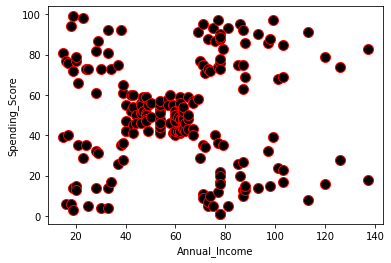

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('mall_customers.csv')
plt.scatter(data.iloc[:, 0], data.iloc[:, 1],
            s=100, c='k', linewidths=1, edgecolors='r')
plt.xlabel(f'{data.columns[0]}')
plt.ylabel(f'{data.columns[1]}')
plt.show()

**4.2**

Implementation of the k-means algorithm

In [2]:
# Distance between 2 points
def distance_between_points(point1, point2, order=2):
    return np.sum(np.abs(point1-point2) ** order) ** (1. / order)

# selecting random centers from the data
def centers_from_data(data, k):
    rand_ind = np.random.randint(len(data), size=k)
    return data[rand_ind, :]

# finding the avg point in every cluster
def centers_new(clusters):
    centers = []
    for cluster in clusters:
        centers.append(np.average(np.array(cluster), axis=0))
    return np.array(centers)

# k-means algorithm implementation
def k_means(data, k, error=0.01,
            centers_alg=centers_new,
            distance_alg=distance_between_points, **kwargs):
    data = np.array(data)
    cost_old = np.infty
    centers = centers_from_data(data, k)
    while True:
        clusters = [[] for i in range(k)]
        cost = 0
        for x in data:
            distances = np.array([
                distance_alg(x, c, **kwargs) for c in centers
            ])
            arg_min = distances.argmin()
            cost += distances[arg_min]
            clusters[arg_min].append(x)
        # check if there is an empty cluster
        # if so, assigning a random point to this center
        for i, cluster in enumerate(clusters):
            if len(cluster) == 0:
                clusters[i] = data[np.random.randint(len(data), size=1), :]
                print('cluster is empty')
                break
        centers = centers_alg(clusters)
        if np.abs(cost - cost_old) < error:
            # returning centers and clusters
            return centers, clusters
        else:
            cost_old = cost

Plotting clusters and their centers. The number of clusters was chosen equal to 5.

The Center group probably represents an ordinary average customer. The top left group is the people
who spend more than they can afford so they are probably in debt. The bottom left and right groups
probably saving money. The top right group represents rich people who spend a lot.

Centers coordinates:
 [[86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


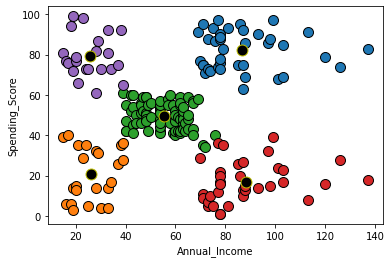

In [3]:
centers, clusters = k_means(data, k=5, error=0.0001)
for cluster in clusters:
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1],
                s=100, linewidths=1, edgecolors='k')
plt.scatter(centers[:, 0], centers[:, 1],
            s=120, c='k', linewidths=1, edgecolors='y')
print(f'Centers coordinates:\n {centers}')
plt.xlabel(f'{data.columns[0]}')
plt.ylabel(f'{data.columns[1]}')
plt.show()

**4.3**

Using KMeans in sklearn. The centers and clusters are exactly the same up.
However, their algorithm less often finds other local minima. Probably their way to
initiate the centers is something different than just selecting 5 random points.

Centers coordinates:
 [[86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]]


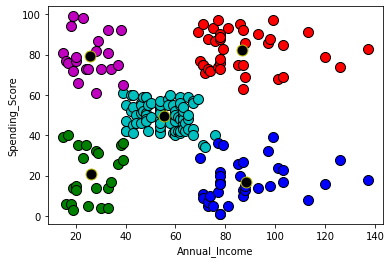

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=np.random.randint(1e5)).fit(data)
centers = kmeans.cluster_centers_
predict = kmeans.predict(data)
colors = ['r', 'b', 'g', 'c', 'm']
for i, dot in enumerate(np.array(data)):
    cluster_ind = predict[i]
    plt.scatter(dot[0], dot[1],
            s=100, c=colors[cluster_ind], linewidths=1, edgecolors='k')
plt.scatter(centers[:, 0], centers[:, 1],
            s=120, c='k', linewidths=1, edgecolors='y')
print(f'Centers coordinates:\n {centers}')
plt.xlabel(f'{data.columns[0]}')
plt.ylabel(f'{data.columns[1]}')
plt.show()

**4.4**

In order to implement the k-median algorithm, we need to change the metric in our k-mean
function to 1-norm and also change the way we determine new centers of each cluster to
the median value instead of the mean value.

Metrics can be change but changing the order value in my function distance_between_points.
The median is implemented below.

In [5]:
def centers_median(clusters):
    centers = []
    for cluster in clusters:
        centers.append(np.median(np.array(cluster), axis=0))
    return np.array(centers)

Now, let's try our k-median algorithm and compare it to the k-mean.

Coordinates of the centers are different (because now they are median values, not mean values
of clusters).

We can also see that clusters are a little bit different compared to k-mean. For example,
the bottom right corner of the central cluster has extra 3 dots from the bottom right cluster in
the k-mean solution.

Centers coordinates:
 [[54.  50. ]
 [80.  16.5]
 [24.5 77. ]
 [24.  15. ]
 [79.  83. ]]


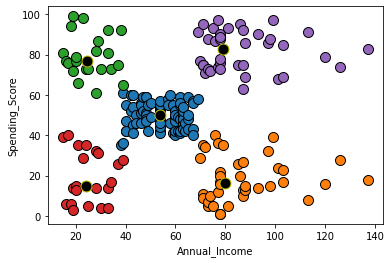

In [6]:
centers, clusters = k_means(
    data, k=5, error=0.01,centers_alg=centers_median,
    distance_alg=lambda x, y: distance_between_points(x, y, order=1)
)
for cluster in clusters:
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1],
                s=100, linewidths=1, edgecolors='k')
plt.scatter(centers[:, 0], centers[:, 1],
            s=120, c='k', linewidths=1, edgecolors='y')
print(f'Centers coordinates:\n {centers}')
plt.xlabel(f'{data.columns[0]}')
plt.ylabel(f'{data.columns[1]}')
plt.show()

# **5 Convolutional Neural Network on CIFAR-10 (Yi)**

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.dataset import random_split
from torchvision import datasets
from sklearn.metrics import confusion_matrix
import PIL

c:\users\cmex-\appdata\local\programs\python\python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.7) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [29]:
##Do Not Touch This Cell

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.bn1 = nn.BatchNorm2d(8)
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16*6*6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.bn2(self.conv2(out)))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [28]:
##Do Not Touch This Cell

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net().to(device)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
if device =='cuda':
    print("Train on GPU...")
else:
    print("Train on CPU...")

Train on CPU...


In [30]:
##Do Not Touch This Cell
max_epochs = 50

random_seed = 671
torch.manual_seed(random_seed)

In [31]:
train_transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

test_transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
##TODO: Split the set into 80% train, 20% validation (there are 50K total images)
train_num = 0.8
val_num = 0.2
train_set, val_set = random_split(dataset, [train_num, val_num])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=128, shuffle=False)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


**5.1**

In [32]:
loss_list, acc_list = [], []
loss_list_val, acc_list_val = [], []
criterion = nn.CrossEntropyLoss()

for epoch in range(max_epochs):
    #TODO: set the net to train mode:
    net.train()
    epoch_loss = 0.0
    correct = 0
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()
        ##TODO: pass the data into the network and store the output
        output = net(data)
        ##TODO: Calculate the cross entropy loss between the output and target
        loss = criterion(output, labels)
        ##TODO: Perform backpropagation
        loss.backward()
        optimizer.step()
        ##TODO: Get the prediction from the output
        _, predicted = torch.max(output, 1)
        ##TODO: Calculate the correct number and add the number to correct
        correct += (predicted==labels).sum().item()
        ##TODO: Add the loss to epoch_loss.
        epoch_loss += loss
    ##TODO: calculate the average loss
    avg_loss = epoch_loss / len(train_loader)
    ##TODO: calculate the average accuracy
    avg_acc = correct / len(train_set)
    ##TODO: append average epoch loss to loss list
    loss_list.append(avg_loss.detach().numpy())
    ##TODO: append average accuracy to accuracy list
    acc_list.append(avg_acc)
    # validation
    ##TODO: set the model to eval mode
    net.eval()
    with torch.no_grad():
        loss_val = 0.0
        correct_val = 0
        for batch_idx, (data, labels) in enumerate(val_loader):
            data, labels = data.to(device), labels.to(device)
            ##TODO: pass the data into the network and store the output
            output = net(data)
            ##TODO: Calculate the cross entropy loss between the output and target
            loss = criterion(output, labels)
            ##TODO: Get the prediction from the output
            _, predicted = torch.max(output, 1)
            ##TODO: Calculate the correct number and add the number to correct_val
            correct_val += (predicted==labels).sum().item()
            ##TODO: Add the loss to loss_val
            loss_val += loss
        ##TODO: calculate the average loss of validation
        avg_loss_val = loss_val / len(val_loader)
        ##TODO: calculate the average accuracy of validation
        avg_acc_val = correct_val / len(val_set)
        ##TODO: append average epoch loss to loss list of validation
        loss_list_val.append(avg_loss_val.detach().numpy())
        ##TODO: append average accuracy to accuracy list of validation
        acc_list_val.append(avg_acc_val)
    print('[epoch %d] loss: %.5f accuracy: %.4f val loss: %.5f val accuracy: %.4f' % (epoch + 1, avg_loss, avg_acc, avg_loss_val, avg_acc_val))

[epoch 1] loss: 2.00165 accuracy: 0.2815 val loss: 1.68490 val accuracy: 0.3771
[epoch 2] loss: 1.55256 accuracy: 0.4299 val loss: 1.54955 val accuracy: 0.4290
[epoch 3] loss: 1.38709 accuracy: 0.4958 val loss: 1.37098 val accuracy: 0.5061
[epoch 4] loss: 1.28704 accuracy: 0.5384 val loss: 1.27861 val accuracy: 0.5367
[epoch 5] loss: 1.21482 accuracy: 0.5662 val loss: 1.31040 val accuracy: 0.5363
[epoch 6] loss: 1.16633 accuracy: 0.5872 val loss: 1.30451 val accuracy: 0.5606
[epoch 7] loss: 1.12508 accuracy: 0.6028 val loss: 1.19877 val accuracy: 0.5802
[epoch 8] loss: 1.09038 accuracy: 0.6153 val loss: 1.16493 val accuracy: 0.5940
[epoch 9] loss: 1.05843 accuracy: 0.6243 val loss: 1.17662 val accuracy: 0.5841
[epoch 10] loss: 1.03495 accuracy: 0.6345 val loss: 1.10366 val accuracy: 0.6143
[epoch 11] loss: 1.01283 accuracy: 0.6426 val loss: 1.20388 val accuracy: 0.5810
[epoch 12] loss: 0.98665 accuracy: 0.6505 val loss: 1.04932 val accuracy: 0.6347
[epoch 13] loss: 0.96337 accuracy: 0.

**5.2**

We can see, that after the epoch ~25 the model starts overfitting the data: the training loss is going down
but the validation loss is increasing.

Same happens with the accuracy. The validation accuracy reaches the plato near the epoch ~20 and even starts
 decreasing after the epoch ~30.

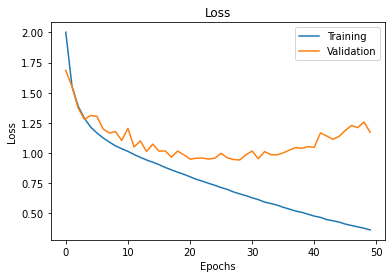

In [33]:
##TODO: Plot the training losses and validation losses

epochs = np.arange(max_epochs)
fig, ax = plt.subplots(1, 1)
ax.plot(epochs, loss_list, label='Training')
ax.plot(epochs, loss_list_val, label='Validation')
ax.set_title('Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.legend()
plt.show()

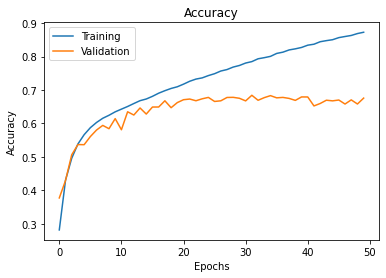

In [34]:
##TODO: Plot the training accuracies and validation accuracies
fig, ax = plt.subplots(1, 1)
ax.plot(epochs, acc_list, label='Training')
ax.plot(epochs, acc_list_val, label='Validation')
ax.set_title('Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
plt.legend()
plt.show()

**5.3**

In [35]:
#Test
true_labels = []
predictions = []
correct_test = 0
net.eval()
with torch.no_grad():
    for batch_idx, (data, label) in enumerate(test_loader):
        data, label = data.to(device), label.to(device)
        ##TODO: pass the data into the network and store the output
        output = net(data)
        ##TODO: Get the prediction from the output
        _, predicted = torch.max(output, 1)
        ##TODO: Calculate the correct number and add the number to correct_test
        correct_test += (predicted==label).sum().item()
        ##TODO: update predictions list and true label list
        true_labels.append(label.tolist()[0])
        predictions.append(predicted.tolist()[0])
        ##We can directly append the value because here batch_size=1

print('Accuracy on the 10000 test images: %.2f %%' % (100 * correct_test / len(test_set)))

Accuracy on the 10000 test images: 67.26 %


Test accuracy is ~67%. The most confused classes are cats and dogs. That makes sense because they are 
very similar with each other and moreover, these are 4
similar classes: cats, dogs, deers, and horses. All other classes have the most similarity only in pairs, 
like trucks and cars, or birds and planes, but not 4 strongly "competing" classes.

Birds and planes are 2nd worst group because they can be very similar to each other sometimes.

[[676  21  77  26  34  13  13  12  93  35]
 [ 19 731  15  15  12   7  22   3  55 121]
 [ 66   2 591  80  84  65  58  33  16   5]
 [ 19   8  88 527  75 130  81  33  15  24]
 [ 29   4  94  72 606  44  75  48  20   8]
 [  9   7  86 230  50 522  37  43   9   7]
 [  8   4  63  50  39  28 795   3   5   5]
 [ 13   9  48  63 103  71   9 659   6  19]
 [ 64  25  14  16   6   5  11   5 820  34]
 [ 26  56  13  19  10   8   9  15  45 799]]


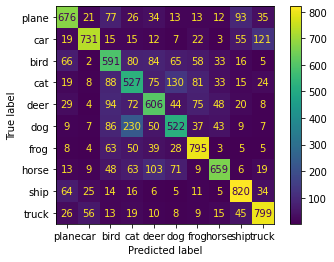

In [36]:
##TODO: print the confusion matrix of test set
##You can use sklearn.metrics.confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_labels, predictions)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()


